## AIMS

- Model how synaptic strengths are dynamically modified based on pre and post synaptic (synapse -> point at which 2 neurons connect) spikes

- Implementing various STDP rules to investigate connectivity, learning and memory formation

- Analyze impact of different STDP parameters and network topologies 

## to do list :
    - 80 excitatory neurons DONE
    - 20 inhibitory neurons DONE
    - raster plot DONE
    - either use 2D or 3D spatially structured network 
        (start with LIF if possible) DONE
    - Simulate pre learning VS Simulate post learning (how does synapse strength change in LIF? )
    - Investigate Hodgkin-Huxley model (how does synapse strength change?)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nest 
import nest.voltage_trace
nest.set_verbosity("M_WARNING")
nest.ResetKernel()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Jan 27 2025 08:17:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



# PRE LEARNING

In [23]:
params_dict = {"I_e": 200.0, "tau_m": 20.0}

excitatory_neuron_nodes = nest.Create(model="iaf_psc_alpha", n=80, params=params_dict)
inhibitory_neuron_nodes = nest.Create(model="iaf_psc_alpha", n=20, params=params_dict)

In [24]:
print(excitatory_neuron_nodes)

NodeCollection(metadata=None, model=iaf_psc_alpha, size=80, first=205, last=284)


In [25]:
print(inhibitory_neuron_nodes)

NodeCollection(metadata=None, model=iaf_psc_alpha, size=20, first=285, last=304)


### measurement tool

In [26]:
voltmeter = nest.Create("voltmeter")
print(voltmeter)

NodeCollection(metadata=None, model=voltmeter, size=1, first=305)


In [27]:
spike_recorder = nest.Create("spike_recorder")
print(spike_recorder)

NodeCollection(metadata=None, model=spike_recorder, size=1, first=306)


In [28]:
weight = 20.0
delay = 1.0
p = 0.2

connection_spec = {"rule": "pairwise_bernoulli", "p": p}

nest.Connect(excitatory_neuron_nodes,
             excitatory_neuron_nodes,
             connection_spec,
             syn_spec={
                 "weight": weight,
                 "delay": delay
             })

nest.Connect(inhibitory_neuron_nodes,
             inhibitory_neuron_nodes,
             connection_spec,
             syn_spec={
                 "weight": -50.0,
                 "delay": delay
             })

nest.Connect(excitatory_neuron_nodes, 
             inhibitory_neuron_nodes, 
             connection_spec,
             syn_spec={
                "weight": weight,
                "delay": delay
            })


nest.Connect(inhibitory_neuron_nodes,
             excitatory_neuron_nodes,
             connection_spec,
             syn_spec={
                "weight": -50.0,
                "delay": delay
            })


Jun 28 11:44:18 ConnectionManager [Warning]: 
    New connections created, connection descriptors previously obtained using 
    'GetConnections' are now invalid.


## Parameters definition

- I_e -> External current 
- tau_m -> How quickly neuron's membrane potential decays back to stabilised rate
- synapse_model -> Specifying use of STDP model so that the synapses (connections) can learn
- weight -> Synapse strength
- delay -> time it takes for one spike to travel from one neuron to another
- alpha -> learning rate for changing the synaptic weight
- tau_plus -> Time it takes for synapse to strengthen after fire?


In [29]:
nest.Connect(voltmeter, excitatory_neuron_nodes)

nest.Connect(voltmeter, inhibitory_neuron_nodes)

nest.Connect(excitatory_neuron_nodes, spike_recorder)
nest.Connect(inhibitory_neuron_nodes, spike_recorder)

In [30]:
nest.Simulate(400.0)

In [31]:
nest.SetStatus(voltmeter, params={})

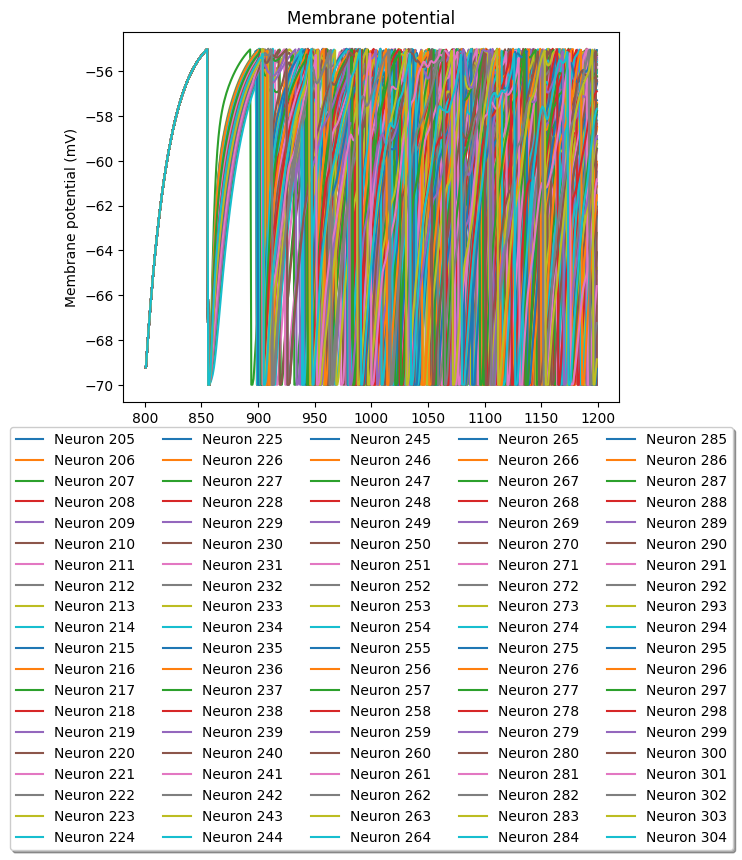

In [32]:
nest.voltage_trace.from_device(voltmeter)
# plt.legend().set_visible(False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

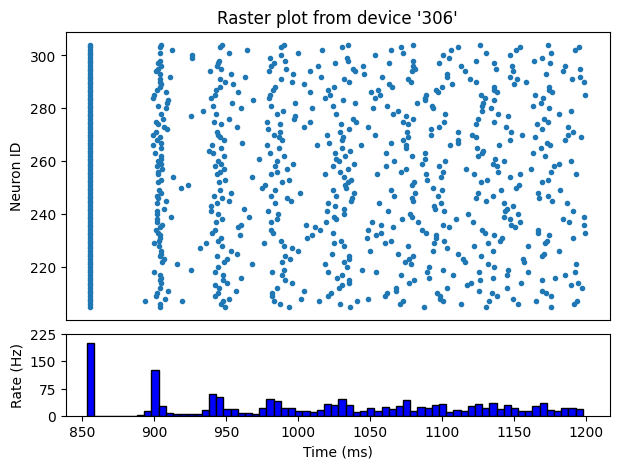

In [33]:
import nest.raster_plot
nest.raster_plot.from_device(spike_recorder, hist=True)
plt.show()

In [34]:
initial_connections = nest.GetConnections(source=excitatory_neuron_nodes, target=inhibitory_neuron_nodes)
initial_weights = nest.GetStatus(initial_connections, 'weight')

# POST LEARNING

In [14]:
# nest.ResetKernel()

In [15]:
params_dict_2 = {"I_e": 200.0, "tau_m": 20.0}

syn_spec_stdp = {
    "model": "stdp_synapse",
    "weight": 20.0,
    "delay": 1.0
}

excitatory_neuron_nodes_2 = nest.Create(model="iaf_psc_alpha", n=80, params=params_dict_2)
inhibitory_neuron_nodes_2 = nest.Create(model="iaf_psc_alpha", n=20, params=params_dict_2)

##  connection excitatory-excitatory, inhibitory-inhibitory, excitatory-inhibitory, inhibitory-excitatory 


- Note: inhibitory must be set to negative reduce activity or other neurons and ensure stable activity

In [16]:

connection_spec_2 = {"rule": "pairwise_bernoulli", "p": 0.2} # sparsely connected network as each neuron is set to connection chance of 20%


nest.Connect(excitatory_neuron_nodes_2,
             excitatory_neuron_nodes_2,
             connection_spec_2,
             syn_spec={
                 "synapse_model": "stdp_synapse",
                 "weight": syn_spec_stdp["weight"],
                 "delay": syn_spec_stdp["delay"]
             })

nest.Connect(inhibitory_neuron_nodes_2,
             inhibitory_neuron_nodes_2,
             connection_spec_2,
             syn_spec={
                "synapse_model": "stdp_synapse",
                "weight": -50.0,
                "delay": syn_spec_stdp["delay"]
            })


nest.Connect(excitatory_neuron_nodes_2,
             inhibitory_neuron_nodes_2,
             connection_spec_2,
             syn_spec={
                    "synapse_model": "stdp_synapse",
                    "weight": syn_spec_stdp["weight"],
                    "delay": syn_spec_stdp["delay"]
            })

nest.Connect(inhibitory_neuron_nodes_2,
            excitatory_neuron_nodes_2,
            connection_spec_2,
            syn_spec={
                "synapse_model": "stdp_synapse",
                "weight": -50.0,
                "delay": syn_spec_stdp["delay"]
            })


Jun 28 11:23:16 ConnectionManager [Warning]: 
    New connections created, connection descriptors previously obtained using 
    'GetConnections' are now invalid.


In [17]:
spike_recorder_2 = nest.Create("spike_recorder")
print(spike_recorder_2)

NodeCollection(metadata=None, model=spike_recorder, size=1, first=203)


In [18]:
stimulus_2 = nest.Create("poisson_generator", params={"rate": 1000.0})
nest.Connect(stimulus_2, excitatory_neuron_nodes_2[:10]) 


nest.Connect(excitatory_neuron_nodes_2, spike_recorder_2)
nest.Connect(inhibitory_neuron_nodes_2, spike_recorder_2)

In [19]:
nest.Simulate(400)

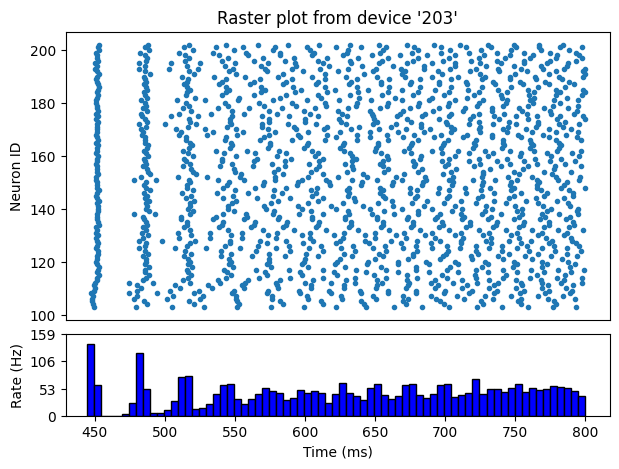

In [20]:
nest.raster_plot.from_device(spike_recorder_2, hist=True)
plt.show()

In [21]:
final_connections = nest.GetConnections(source=excitatory_neuron_nodes_2, target=inhibitory_neuron_nodes_2)
final_weights = nest.GetStatus(final_connections, 'weight')

In [ ]:
print(f"Initial mean weight (PRE LEARNING PHASE): {np.mean(initial_weights)}")
print(f"Final mean weight: {np.mean(final_weights)}")

Initial mean weight: 20.0
Final mean weight: 27.25149664592247


## current state: the synaptic weight has increased

# Training the SNN to understand patterns through temporal-sequential learning

# Each sequence will be trained on a separate group of excitatory neurons -> 80 excitatory neurons / 3 = 26.6 - 27 per group

In [36]:
sequence_times = {
    "SEQUENCE_1": [10, 110, 210, 310, 410],
    "SEQUENCE_2": [30, 130, 230, 330, 430],
    "SEQUENCE_3": [50, 150, 250, 350, 450]
}

In [37]:
group_A = excitatory_neuron_nodes[:27]
group_B = excitatory_neuron_nodes[27:54]
group_C = excitatory_neuron_nodes[54:79]

In [39]:
print(group_A)
print(group_B)
print(group_C)

NodeCollection(metadata=None, model=iaf_psc_alpha, size=27, first=205, last=231)
NodeCollection(metadata=None, model=iaf_psc_alpha, size=27, first=232, last=258)
NodeCollection(metadata=None, model=iaf_psc_alpha, size=25, first=259, last=283)
